In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.mixture import GaussianMixture

In [5]:
# Load Dataset
file_path = r"C:\Users\jyots\Downloads\CLEAN- PCOS SURVEY SPREADSHEET.csv"
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              465 non-null    int64  
 1   Weight           465 non-null    float64
 2   Height           465 non-null    float64
 3   Blood_Group      465 non-null    int64  
 4   Period_Cycle     465 non-null    int64  
 5   Weight_Gain      465 non-null    int64  
 6   Facial_Hair      465 non-null    int64  
 7   Skin_Darkening   465 non-null    int64  
 8   Hair_Loss        465 non-null    int64  
 9   Acne             465 non-null    int64  
 10  Fast_Food        465 non-null    int64  
 11  Exercise         465 non-null    int64  
 12  PCOS_Diagnosed   465 non-null    int64  
 13  Mood_Swings      465 non-null    int64  
 14  Regular_Periods  465 non-null    int64  
 15  Period_Duration  465 non-null    int64  
dtypes: float64(2), int64(14)
memory usage: 58.3 KB
None
   Age  We

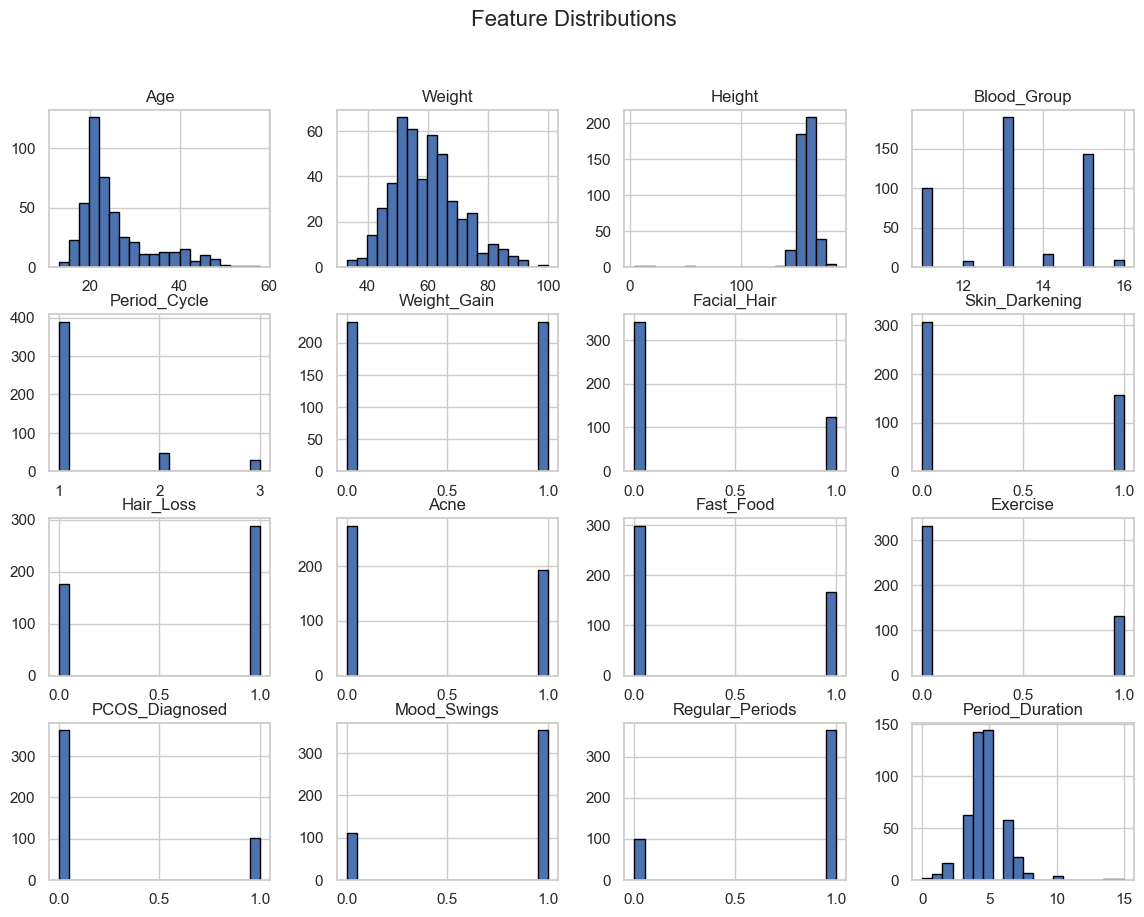

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Plot histograms for numerical features
df.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


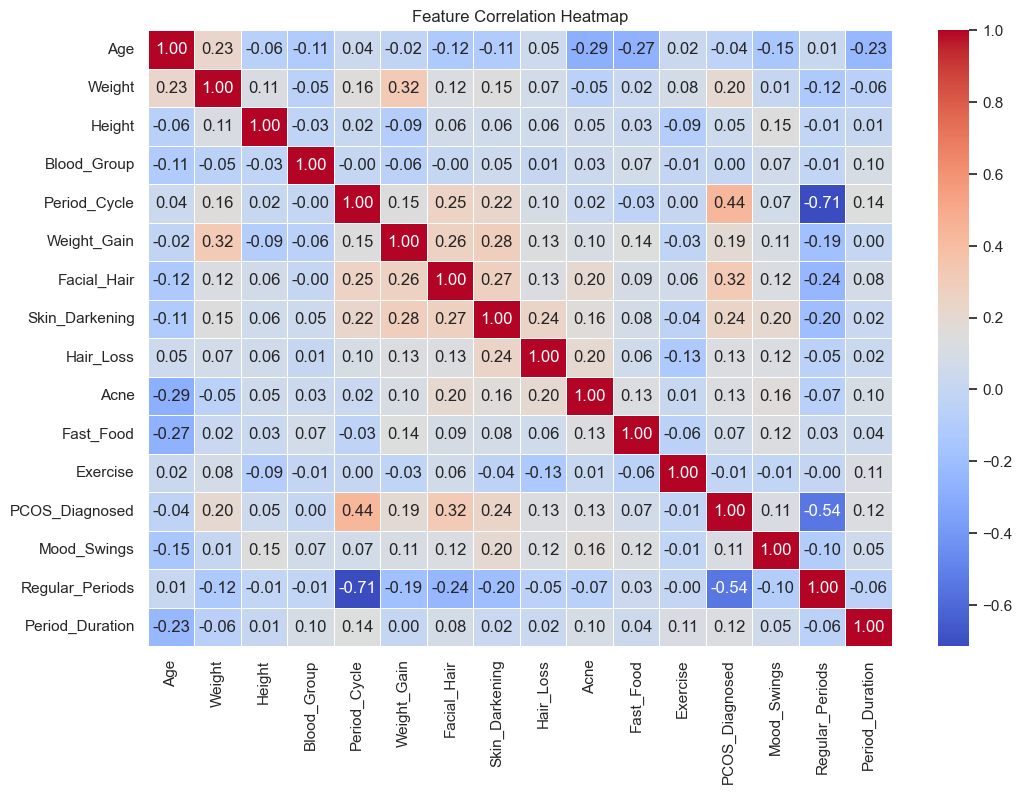

In [9]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


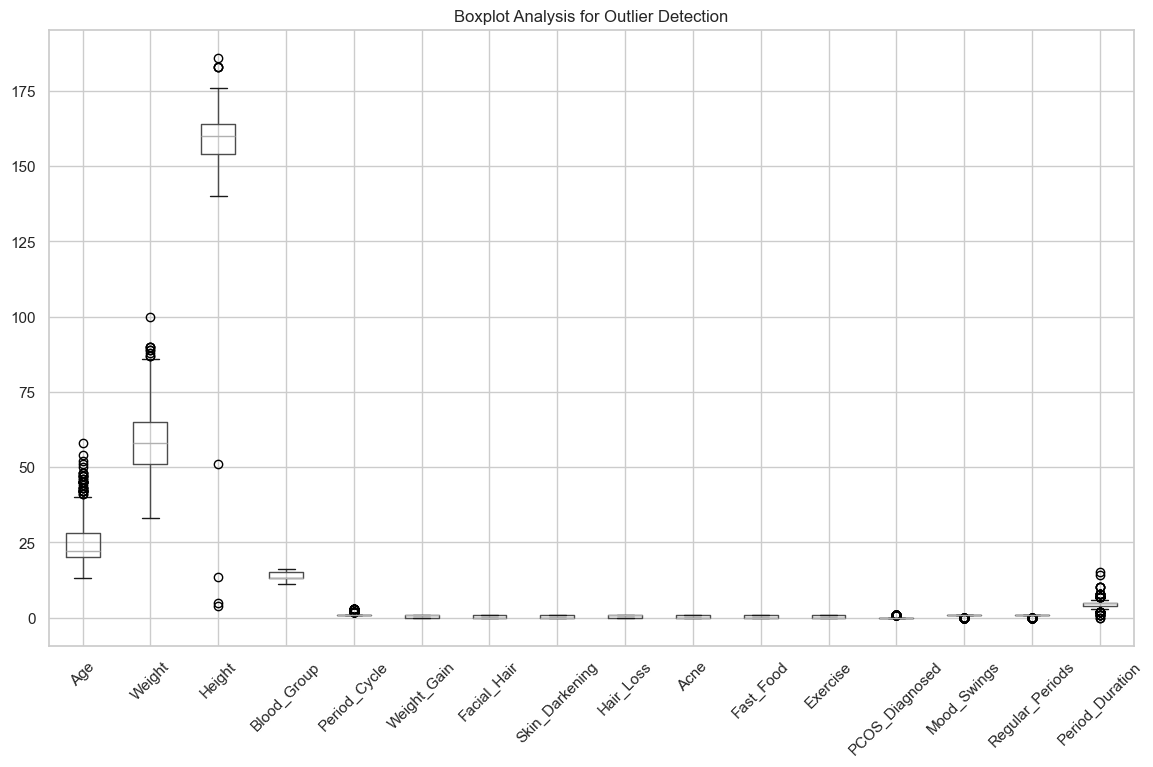

In [13]:
# Plot boxplots for numerical features to detect outliers
plt.figure(figsize=(14, 8))
df.boxplot(rot=45)
plt.title("Boxplot Analysis for Outlier Detection")
plt.show()


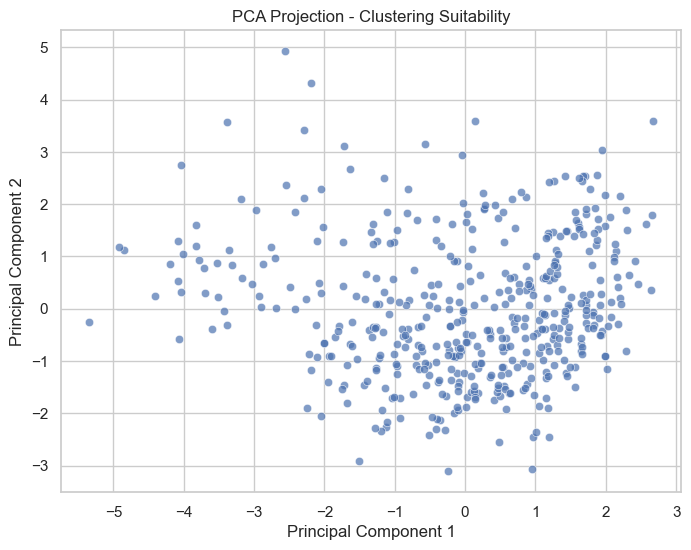

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (excluding categorical variables)
numerical_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['PCOS_Diagnosed'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

# Apply PCA to check clustering feasibility
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Scatter plot of PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], alpha=0.7)
plt.title("PCA Projection - Clustering Suitability")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
